# Perceptron, Adaline GradientDescent and Stochastic GradientDescent

<h3>1. LOAD SAMPLE IRIS DATA (X,y)</h3>

In [13]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<h3>2. PLOT DATA TO SEE DISTRIBUTION </h3>

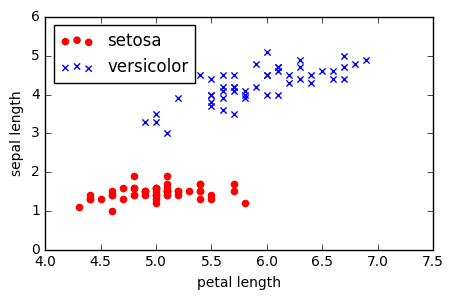

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# to get 4rth column value for first 100 rows
y = df.iloc[0:100, 4].values
y = np.where(y== 'Iris-setosa', -1, 1)

# take sepal length & petal length columns (0th & 2nd)
X = df.iloc[0:100, [0,2]].values
plt.figure(figsize=(5, 3))
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[51:100, 0], X[51:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

# 3. PERCEPTRON: on given input (vs) normalized input
As we can see in the below plot, it converged quicker (in lesser epochs) with normalized input

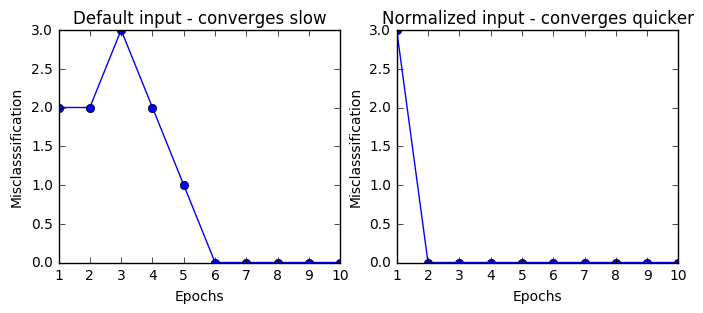

In [16]:
###########################################################################################
# PERCEPTRON OR GD (Gradient descent): Default VS Normalized X.
###########################################################################################

%run 'Perceptron.ipynb'
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X,y)
#print (ppn_std.errors_)

# normalize input and apply perceptron
X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - X_std[:,0].mean())/X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean())/X_std[:,1].std()
ppn_std = Perceptron(eta=0.01, n_iter=10)
ppn_std.fit(X_std,y)
#print (ppn_std.errors_)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
ax[0].plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o', color='blue')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Misclasssification')
ax[0].set_title('Default input - converges slow')

ax[1].plot(range(1, len(ppn_std.errors_)+1), ppn_std.errors_, marker='o', color='blue')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Misclasssification')
ax[1].set_title('Normalized input - converges quicker')
plt.show()


# 4. Let's plot decision region that perceptron learnt

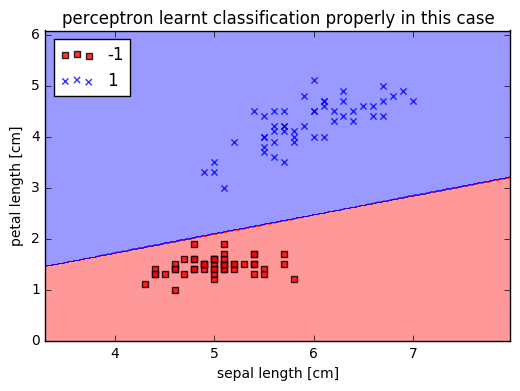

In [17]:
###########################################################################################
# PLOT DECISION REGION
###########################################################################################

%run 'plot_decision_regions.ipynb'
plot_decision_regions(X, y, classifier=ppn)
plt.title('perceptron learnt classification properly in this case')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()



# 5. ADALINE GRADIENT DESCENT: Now, apply  AdalineGD a.k.a BatchGD on the same data with different values of params to compare the performance

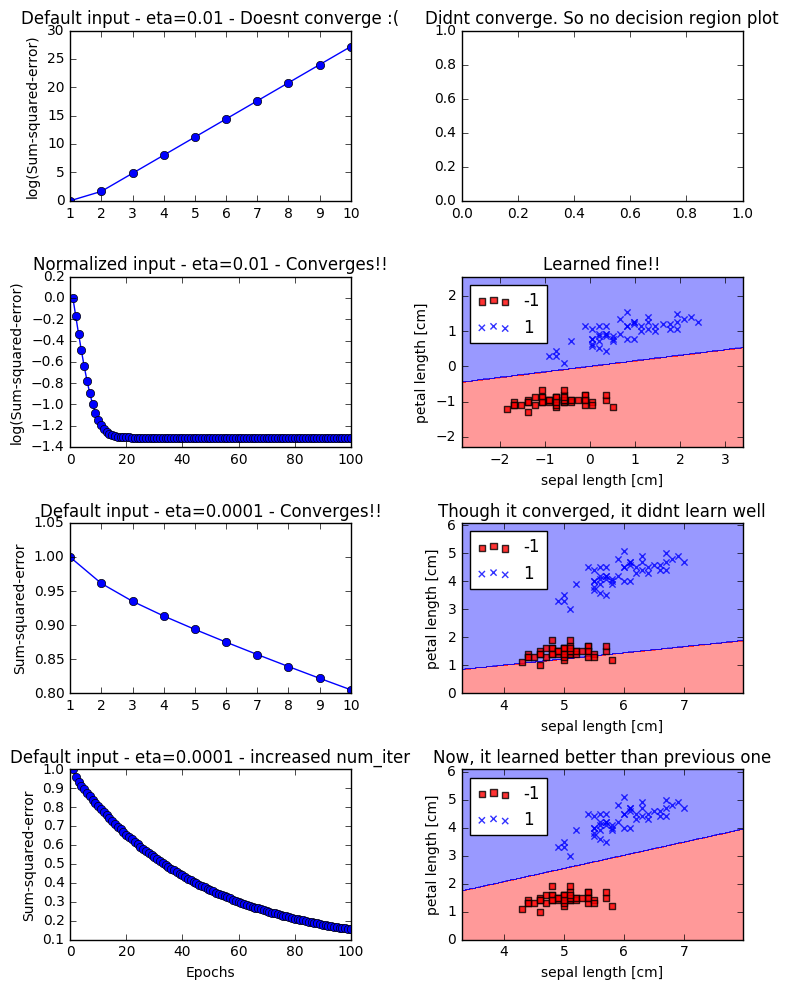

In [40]:
###########################################################################################
# ADALINE GD: Batch gradient descent. It doesnt converge at 0.01 learning rate.
###########################################################################################
import matplotlib.pyplot as plt
%run 'AdalineGD.ipynb'
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8, 10))
#ax = ax.flatten()

X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0][0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
#ax[0].set_xlabel('Epochs')
ax[0][0].set_ylabel('log(Sum-squared-error)')
ax[0][0].set_title('Default input - eta=0.01 - Doesnt converge :(')

ax[0][1].set_title('Didnt converge. So no decision region plot')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[2][0].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
#ax[2].set_xlabel('Epochs')
ax[2][0].set_ylabel('Sum-squared-error')
ax[2][0].set_title('Default input - eta=0.0001 - Converges!!') # So, we either need smalllll eta or normalized input to converge')

plot_decision_regions(X, y, classifier=ada2, ax=ax[2][1])
ax[2][1].set_xlabel('sepal length [cm]')
ax[2][1].set_ylabel('petal length [cm]')
ax[2][1].set_title('Though it converged, it didnt learn well')
ax[2][1].legend(loc='upper left')

ada3 = AdalineGD(n_iter=100, eta=0.0001).fit(X, y)
ax[3][0].plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
ax[3][0].set_xlabel('Epochs')
ax[3][0].set_ylabel('Sum-squared-error')
ax[3][0].set_title('Default input - eta=0.0001 - increased num_iter')# - looks same as above. Lets see the impact of num_iterarions in the next section')

plot_decision_regions(X, y, classifier=ada3, ax=ax[3][1])
ax[3][1].set_xlabel('sepal length [cm]')
ax[3][1].set_ylabel('petal length [cm]')
ax[3][1].set_title('Now, it learned better than previous one')
ax[3][1].legend(loc='upper left')

ada_std = AdalineGD(n_iter=100, eta=0.01).fit(X_std, y)
ax[1][0].plot(range(1, len(ada_std.cost_) + 1), np.log10(ada_std.cost_), marker='o')
#ax[1].set_xlabel('Epochs')
ax[1][0].set_ylabel('log(Sum-squared-error)')
ax[1][0].set_title('Normalized input - eta=0.01 - Converges!!')

plot_decision_regions(X_std, y, classifier=ada_std, ax=ax[1][1])
ax[1][1].set_xlabel('sepal length [cm]')
ax[1][1].set_ylabel('petal length [cm]')
ax[1][1].legend(loc='upper left')
ax[1][1].set_title('Learned fine!!')
plt.tight_layout()
plt.show()

# 6. ADALINE STOCHASTIC GRADIENT DESCENT

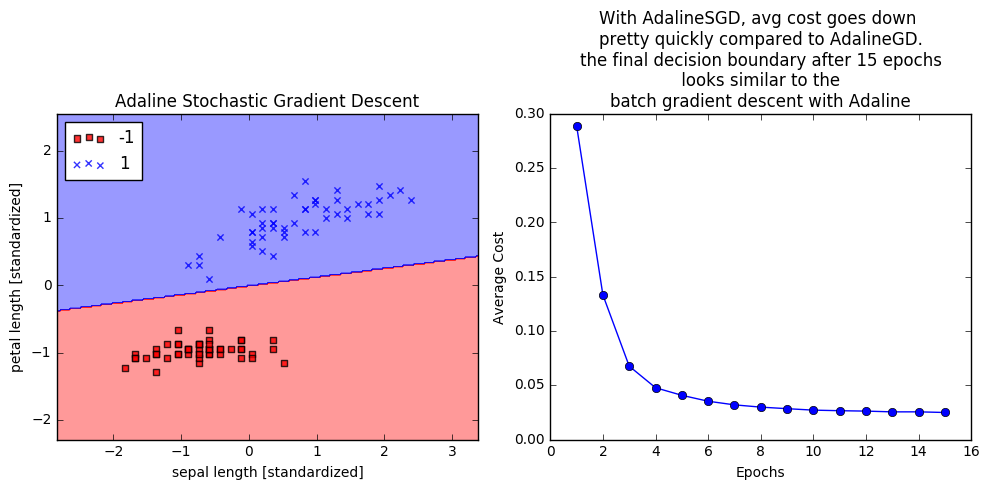

In [46]:
%run 'AdalineSGD.ipynb'

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
adaSgd = AdalineSGD(eta=0.01, n_iter=15, random_state=1)
adaSgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=adaSgd, ax=ax[0])
ax[0].set_title('Adaline Stochastic Gradient Descent')
ax[0].set_xlabel('sepal length [standardized]')
ax[0].set_ylabel('petal length [standardized]')
ax[0].legend(loc='upper left')

ax[1].plot(range(1, len(adaSgd.cost_) + 1), adaSgd.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Average Cost')
ax[1].set_title('With AdalineSGD, avg cost goes down \npretty quickly compared to AdalineGD.\nthe final decision boundary after 15 epochs\n looks similar to the \nbatch gradient descent with Adaline')
plt.tight_layout()
plt.show()